<a href="https://colab.research.google.com/github/RosaGelvis/Proyecto-Final-Data-Science/blob/main/ProyectoFinal_Gelvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

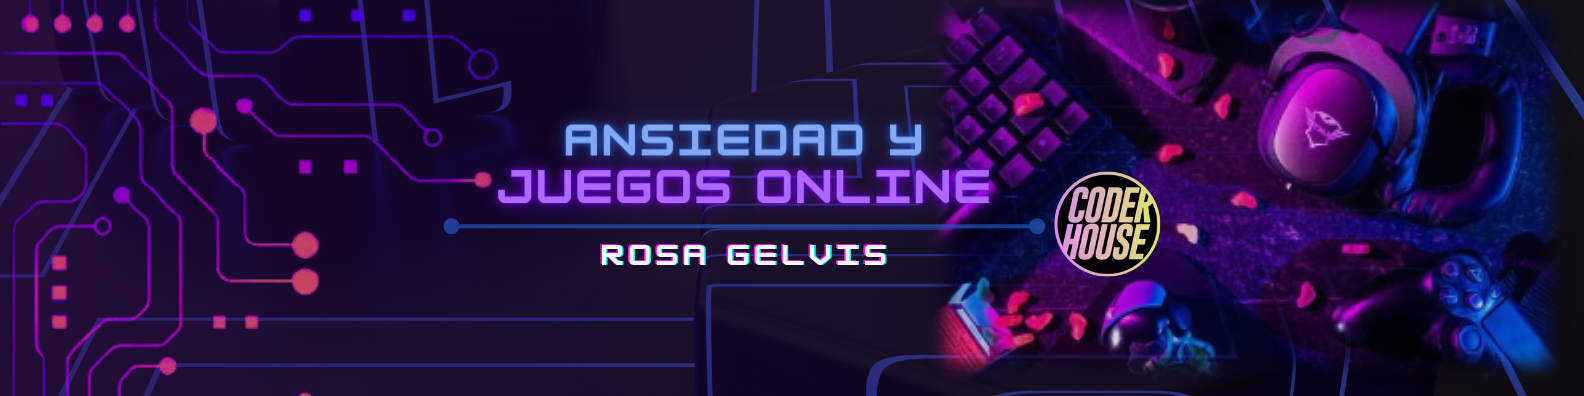

# ¿Influye el estilo de juego en el nivel de ansiedad de los jugadores?

##Tabla de Contenido

#####    [Presentación](https://drive.google.com/file/d/1CEskHcNP4B5ET0oMQKrlEDd4yLHRTlOc/view?usp=sharing)
##### 1. [Introducción](#scrollTo=P7pxdB-XdP1T&line=1&uniqifier=1)

*   ######  [1.1 Contexto empresarial](#scrollTo=cRAwP36fdVi9&line=1&uniqifier=1)
*   ###### [1.2 Problema comercial](#scrollTo=QajfdTYsdi4m&line=1&uniqifier=1)
*   ######  [1.3 Contexto analítico](#scrollTo=ZZFWYmzYdrCZ&line=1&uniqifier=1)


##### 2. [Librerias importadas](#scrollTo=9qG-3nURJKEC&line=1&uniqifier=1)
##### 3. [Data Acquisition](#scrollTo=X24oDaGjPr8S&line=1&uniqifier=1)
##### 4. [Exploratory Data Analysis (EDA) y Data Wrangling](#scrollTo=7uzP9154SpRR&line=1&uniqifier=1)

*   ###### [4.1 Información sobre el DataFrame](#scrollTo=1ls6HlHpHxsJ&line=1&uniqifier=1)
*   ###### [4.2 Descripción general de los datos](#scrollTo=rH9ifmy4Hq_a)
*   ###### [4.3 Valores Nulos](#scrollTo=A67G2fx1HTdB)
>[Gráficamente](#scrollTo=-ynyI3HOVqZK&line=1&uniqifier=1)

*   ###### [4.4 Registros Duplicados](#scrollTo=h5YQJv1Qe0Nb)
*   ###### [4.5 Eliminar Columnas Irrelevantes](#scrollTo=yD68WoNTGQjK)
*   ###### [4.6 Transformar Tipo de Datos](#scrollTo=JFkgO93_KrWm)


##### 5. [Analisis Univariado](#scrollTo=Jl7xabY1WNEx&line=1&uniqifier=1)
##### 6. [Analisis Bivariado](#scrollTo=ZJc0p90vEvZA&line=1&uniqifier=1)
##### 7. [Respuestas de Hipótesis](#scrollTo=VerD-wxyf9K5)
*   ######  [10.1 Hipótesis 1](#scrollTo=Nwdcp7fdg2ql&line=1&uniqifier=1)
*   ###### [10.2 Hipótesis 2](#scrollTo=ZH2zjewRg_D7&line=1&uniqifier=1)
*   ######  [10.3 Hipótesis 3](#scrollTo=KY15oX-zhCk-&line=1&uniqifier=1)
*   ######  [10.4 Hipótesis 4](#scrollTo=CVlgH3hfORUb&line=1&uniqifier=1)

##### 8. [Analisis Multivariado](#scrollTo=GceRv3jQNuAy)
##### 9. [Entrenando y Evaluando un modelo de Machine Learning](#scrollTo=tCPiZeRHZY7d&line=1&uniqifier=1)

##### 10. [FeatureSelection](#scrollTo=YoZzZJABazGx&line=1&uniqifier=1y)

##### 11. [Crossvalidation](#scrollTo=G8v85bTfpzII&line=20&uniqifier=1)

##### 12. [Conclusiones](#scrollTo=aETzuZuCfChc&line=3&uniqifier=1y)

# 1. Introducción 📑

####**Contexto empresarial:**

Con el transcurrir de los años los juegos online han pasado a ser unos de los principales ocios donde los individuos invierten gran cantidad de tiempo. Se requiere conocer la influencia de los juegos online en relación a la ansiedad de los jugadores residentes de diferentes países durante el periodo 2020.  Para definir patrones se han tomado registros recopilado como parte de una encuesta de jugadores.

####**Problema comercial:**

Se deben explorar los registros para posteriormente generar visualizaciones que ayuden a responder las hipótesis que han surgido

####**Contexto analítico:**

Se posee un Dataset que está relacionado con la ansiedad por los juegos online; el cual se obtuvo desde la plataforma Kaggle, está constituido por columnas donde podemos visualizar el perfil de los jugadores y respuestas de cuestionario donde se planteaban preguntas que los psicólogos suelen hacer a las personas propensas a la ansiedad. Entre sus principales variables tenemos Número de horas semanales dedicadas a jugar(Type: Int), Razón para jugar (Type: String), puntuaciones de GAD (trastorno de ansiedad general) (Type: Int), SWL (satisfacción con la vida) (Type:Int), SPIN (inventario de fobia social)(Type: Int).


De acuerdo a la planteado anteriormente; surgen las siguientes hipótesis:
  
   1.¿Los jugadores de edades más jóvenes experimentan niveles de ansiedad más altos durante los juegos online en comparación con jugadores de edades más avanzadas?

   2.¿A medida que a los jugadores le incrementa su ansiedad, aumenta su fobia social?

   3.¿Normalmente se conectan jugadores los cuales su mayor nivel de estudio es secundario y no superan los 25 años?

   4.¿Los jugadores entre mas jóvenes, presentan menos satisfacción con la vida?
  
  Para responder las referidas hipotesis se crearan graficas de variables correspondientes.


#Librerias importadas ▶

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


#Data Acquisition 📁

In [4]:
df_juegosonline = pd.read_csv('/content/gdrive/MyDrive/dataset_RosaGelvis/Gamingdata.csv') #Leer Archivo CSV

In [5]:
df_juegosonline.head()# Visualizar las primeras filas del DataFrame

,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,Gender,Age,...,Residence,Reference,Playstyle,accept,SWL_T,GAD_T,SPIN_T,Birthplace_ISO3,Narcissism,Residence_ISO3
0,Extremely difficult,Diablo 3,PC,60.0,I play for fun,improving,Gold,0.0,Female,29.0,...,USA,Reddit,with friends or online acquintances vs strangers,Accept,10.0,8.0,26.0,USA,1.0,USA
1,Extremely difficult,Hearthstone,PC,20.0,I play for fun,having fun,Silver,20.0,Male,21.0,...,Netherlands,Reddit,Multiplayer - online - with real life friends,Accept,18.0,14.0,19.0,NLD,1.0,NLD
2,Extremely difficult,League of Legends,"Console (PS, Xbox, ...)",28.0,I play for fun,having fun,unranked,8.0,Male,20.0,...,Portugal,Reddit,Multiplayer - online - with real life friends,Accept,16.0,13.0,52.0,PRT,1.0,PRT
3,Extremely difficult,League of Legends,PC,10.0,I play for fun,having fun,silver IV,20.0,Female,18.0,...,USA,Reddit,with friends or online acquintances vs strangers,Accept,33.0,18.0,60.0,USA,1.0,USA
4,Extremely difficult,League of Legends,PC,10.0,I play for fun,having fun,unranked,15.0,Male,18.0,...,Sweden,Reddit,Multiplayer - online - with real life friends,Accept,7.0,10.0,23.0,SWE,1.0,SWE


#Exploratory Data Analysis (EDA) y Data Wrangling 🔎🧹

###Información sobre el DataFrame

In [6]:
df_juegosonline.info()# Obtener información general sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GADE             940 non-null    object 
 1   Game             996 non-null    object 
 2   Platform         996 non-null    object 
 3   Hours            995 non-null    float64
 4   earnings         996 non-null    object 
 5   whyplay          996 non-null    object 
 6   League           963 non-null    object 
 7   streams          986 non-null    float64
 8   Gender           994 non-null    object 
 9   Age              994 non-null    float64
 10  Work             993 non-null    object 
 11  Degree           874 non-null    object 
 12  Birthplace       994 non-null    object 
 13  Residence        994 non-null    object 
 14  Reference        994 non-null    object 
 15  Playstyle        994 non-null    object 
 16  accept           971 non-null    object 
 17  SWL_T           

###Descripción general de los datos

In [7]:
df_juegosonline.describe()# Resumen estadístico de las variables numéricas

,Hours,streams,Age,SWL_T,GAD_T,SPIN_T,Narcissism
count,995.000000,986.000000,994.000000,994.000000,994.000000,945.000000,991.000000
mean,21.134673,10.293103,21.586519,19.838028,5.498994,20.278307,1.982846
std,13.900985,10.076272,4.159588,7.140295,4.977745,14.269196,1.062068
min,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,1.000000
25%,11.000000,3.000000,19.000000,15.000000,2.000000,9.000000,1.000000
50%,20.000000,8.000000,20.000000,20.000000,4.000000,18.000000,2.000000
75%,28.000000,15.000000,23.000000,25.000000,8.000000,29.000000,3.000000
max,120.000000,90.000000,63.000000,35.000000,21.000000,68.000000,5.000000


###Valores Nulos

In [8]:
df_juegosonline.isnull().sum() #Cantidad de valores nulos por columna

GADE                56
Game                 0
Platform             0
Hours                1
earnings             0
whyplay              0
League              33
streams             10
Gender               2
Age                  2
Work                 3
Degree             122
Birthplace           2
Residence            2
Reference            2
Playstyle            2
accept              25
SWL_T                2
GAD_T                2
SPIN_T              51
Birthplace_ISO3     12
Narcissism           5
Residence_ISO3       9
dtype: int64

In [9]:
pd.set_option('display.max_rows', None)  #porcentaje de valores nulos por columna
serie=(df_juegosonline.isnull().sum()/df_juegosonline.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Degree             12.248996
GADE                5.622490
SPIN_T              5.120482
League              3.313253
accept              2.510040
Birthplace_ISO3     1.204819
streams             1.004016
Residence_ISO3      0.903614
Narcissism          0.502008
Work                0.301205
Reference           0.200803
GAD_T               0.200803
SWL_T               0.200803
Playstyle           0.200803
Birthplace          0.200803
Residence           0.200803
Age                 0.200803
Gender              0.200803
Hours               0.100402
dtype: float64

###Gráficamente

<Axes: >

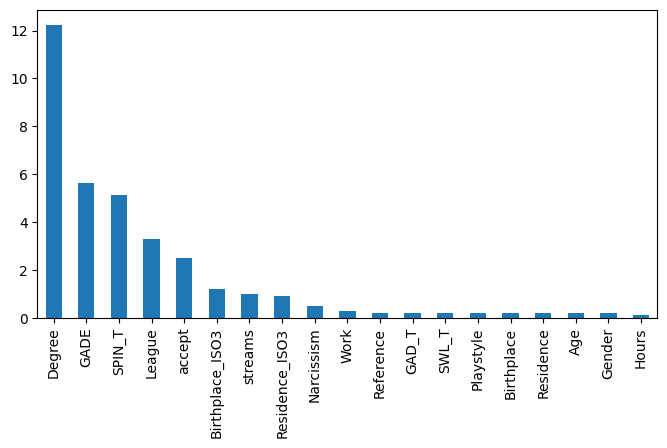

In [10]:
plt.figure(figsize=(8,4))# Graficar valores nulos
serie.plot(kind='bar')

Visualización de correlación existente entre los valores faltantes de diferentes variables

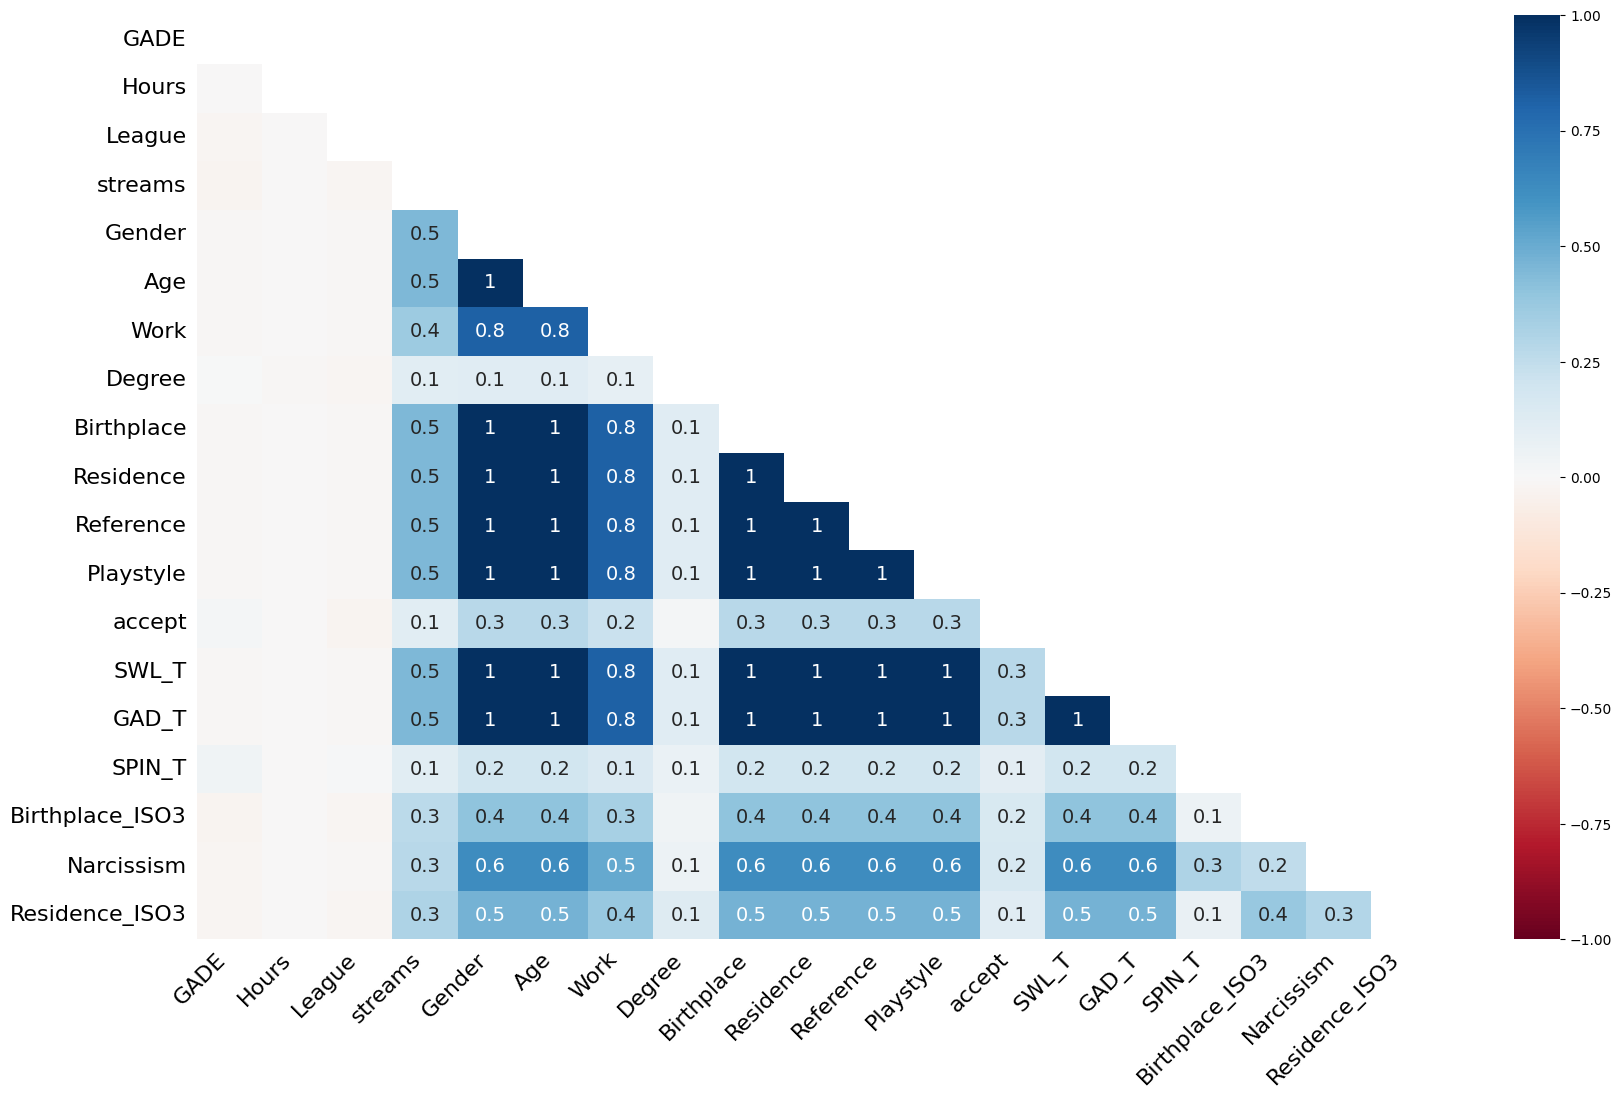

In [11]:
msno.heatmap(df_juegosonline)
plt.show()

Al observar que el % de valores nulos es bajo y no afecta la correlacion entre las variables; se toma la decision de borrar referidas filas donde se encuentren valores nulos

In [12]:
df_juegosonline.dropna(inplace=True) #Eliminar registros con valores null
df_juegosonline.isnull().sum() #Verificar que el Dataframe ya no posee valores null

GADE               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
Gender             0
Age                0
Work               0
Degree             0
Birthplace         0
Residence          0
Reference          0
Playstyle          0
accept             0
SWL_T              0
GAD_T              0
SPIN_T             0
Birthplace_ISO3    0
Narcissism         0
Residence_ISO3     0
dtype: int64

###Registros Duplicados

In [13]:
duplicados = df_juegosonline.duplicated()# Verificar registros duplicados
duplicados.value_counts()

False    725
Name: count, dtype: int64

Se puede observar que el DataFrame no posee registros duplicados

###Eliminar Columnas Irrelevantes

In [14]:
df_juegosonline = df_juegosonline.drop(['accept', 'Birthplace_ISO3', 'Residence','Narcissism','earnings'], axis=1) #la columna "Residence" se elimina porque ya existe "Residence_ISO3"


In [15]:
df_juegosonline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 995
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GADE            725 non-null    object 
 1   Game            725 non-null    object 
 2   Platform        725 non-null    object 
 3   Hours           725 non-null    float64
 4   whyplay         725 non-null    object 
 5   League          725 non-null    object 
 6   streams         725 non-null    float64
 7   Gender          725 non-null    object 
 8   Age             725 non-null    float64
 9   Work            725 non-null    object 
 10  Degree          725 non-null    object 
 11  Birthplace      725 non-null    object 
 12  Reference       725 non-null    object 
 13  Playstyle       725 non-null    object 
 14  SWL_T           725 non-null    float64
 15  GAD_T           725 non-null    float64
 16  SPIN_T          725 non-null    float64
 17  Residence_ISO3  725 non-null    object 


###Transformar Tipo de Datos

In [16]:
df_juegosonline['Hours'] = df_juegosonline['Hours'].round().astype(int) #Transformar tipo de datos para la cantidad de horas de formato float a int

In [17]:
df_juegosonline['Age'] = df_juegosonline['Age'].round().astype(int) #Transformar tipo de datos de columna Edad de formato float a int

In [18]:
df_juegosonline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 995
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GADE            725 non-null    object 
 1   Game            725 non-null    object 
 2   Platform        725 non-null    object 
 3   Hours           725 non-null    int64  
 4   whyplay         725 non-null    object 
 5   League          725 non-null    object 
 6   streams         725 non-null    float64
 7   Gender          725 non-null    object 
 8   Age             725 non-null    int64  
 9   Work            725 non-null    object 
 10  Degree          725 non-null    object 
 11  Birthplace      725 non-null    object 
 12  Reference       725 non-null    object 
 13  Playstyle       725 non-null    object 
 14  SWL_T           725 non-null    float64
 15  GAD_T           725 non-null    float64
 16  SPIN_T          725 non-null    float64
 17  Residence_ISO3  725 non-null    object 


In [19]:
#Agregar una columna condicional para asignar el nivel de ansiedad de acuerdo a la puntuacion Total de GAD
conditions = [
    (df_juegosonline['GAD_T'] <= 4),
    (df_juegosonline['GAD_T'] >= 5) & (df_juegosonline['GAD_T'] <= 9),
    (df_juegosonline['GAD_T'] >= 10) & (df_juegosonline['GAD_T'] <= 14),
    (df_juegosonline['GAD_T'] >= 15)
    ]

In [20]:
values = ['minima', 'leve', 'moderado', 'grave']

In [21]:
df_juegosonline['GAD'] = np.select(conditions, values)
df_juegosonline.head()

,GADE,Game,Platform,Hours,whyplay,League,streams,Gender,Age,Work,Degree,Birthplace,Reference,Playstyle,SWL_T,GAD_T,SPIN_T,Residence_ISO3,GAD
0,Extremely difficult,Diablo 3,PC,60,improving,Gold,0.0,Female,29,Employed,High school diploma (or equivalent),USA,Reddit,with friends or online acquintances vs strangers,10.0,8.0,26.0,USA,leve
1,Extremely difficult,Hearthstone,PC,20,having fun,Silver,20.0,Male,21,Student at college / university,High school diploma (or equivalent),Netherlands,Reddit,Multiplayer - online - with real life friends,18.0,14.0,19.0,NLD,moderado
2,Extremely difficult,League of Legends,"Console (PS, Xbox, ...)",28,having fun,unranked,8.0,Male,20,Unemployed / between jobs,High school diploma (or equivalent),Portugal,Reddit,Multiplayer - online - with real life friends,16.0,13.0,52.0,PRT,moderado
3,Extremely difficult,League of Legends,PC,10,having fun,silver IV,20.0,Female,18,Student at school,High school diploma (or equivalent),USA,Reddit,with friends or online acquintances vs strangers,33.0,18.0,60.0,USA,grave
5,Extremely difficult,League of Legends,PC,12,improving,na,42.0,Male,24,Unemployed / between jobs,High school diploma (or equivalent),USA,Reddit,Multiplayer - online - with real life friends,16.0,15.0,39.0,USA,grave


In [22]:
df_juegosonline['Nivel_Ansiedad'] = df_juegosonline['GAD'].apply(lambda x: 1 if x == 'minima' else (2 if x =='leve' else (3 if x == 'moderado' else 4)))

#Analisis Univariado 📈

***Variables Categoricas:***

En principio se analizan la variables categoricas; para la cual, se estara utilizando graficos de barras con el objetivo de conocer como estan compuestas las variables.


<ipython-input-23-e1a3ec3b28d6>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i)
<ipython-input-23-e1a3ec3b28d6>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i)


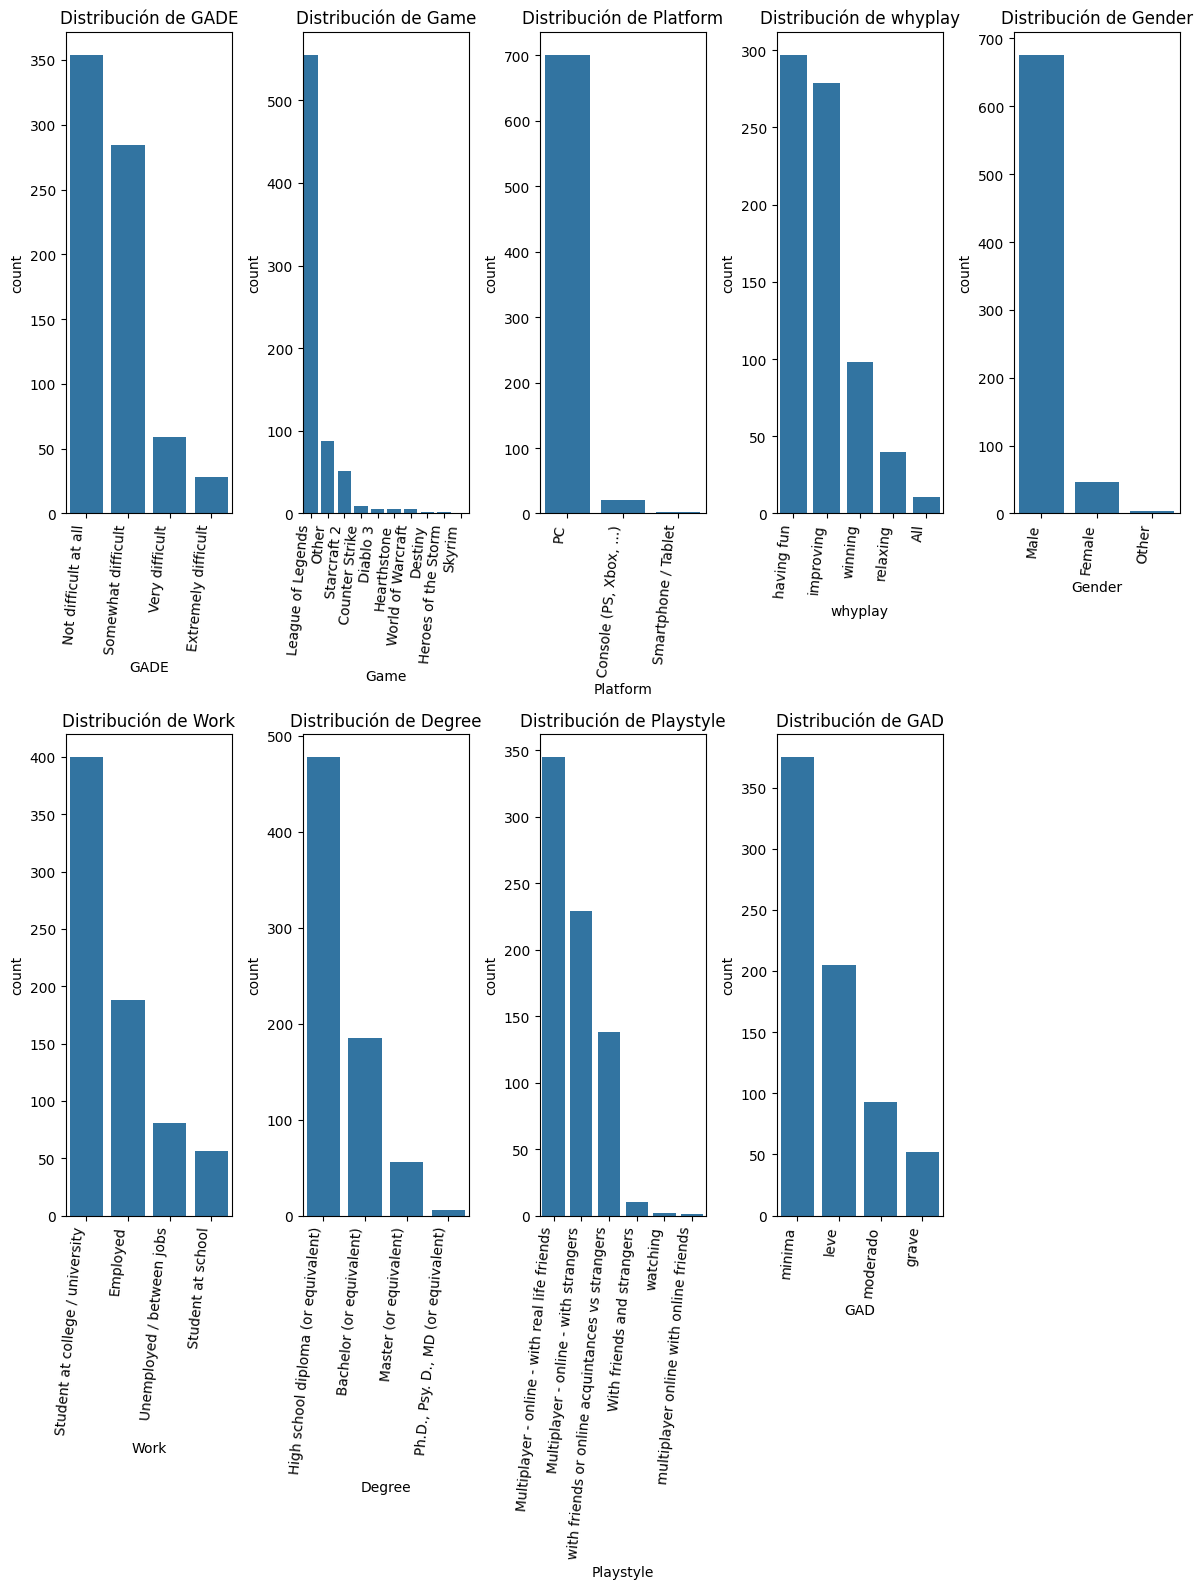

In [23]:
# Lista de variables categóricas
variables_categoricas = ["GADE", "Game", "Platform", "whyplay", "Gender", "Work", "Degree", "Playstyle","GAD"]

# Configurar el tamaño del lienzo para los gráficos
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# Generar gráficos de barras para cada variable categórica
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(2, 5, i)
    sns.countplot(x=variable, data=df_juegosonline, order=df_juegosonline[variable].value_counts().index)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=85, ha='right')  # Ajusta las etiquetas del eje x para mejor visibilidad

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

In [24]:
fig = px.pie(df_juegosonline, values=df_juegosonline.index, names='GAD')
fig.update_layout(height=400, width=600)
fig.show()

Entre las caractericas principales, se puede observar lo siguiente:
*   La mayoria de los jugadores indicaron que el nivel de dificultad de juego **No es nada difícil**

*   Los jugadores que mayormente se conectan son de **genero masculino**
*   El modo de juego Tiende a ser desde la PC
*   El estilo de juego radica en multijugador, en linea, con amigos de la vida real
*   La Razón para jugar la mayoria indicaron que es motivado a **mejorar su jugada**
*   El 41% de los jugadores presenta un nivel de **ansiedad minima**




***Variables numericas:***

En nuestro caso de estudio las variables numericas que se poseen son: Número de horas semanales dedicadas a jugar, Edad, puntuaciones de GAD (**trastorno de ansiedad general**), SWL (**satisfacción con la vida**), SPIN (**inventario de fobia social**).

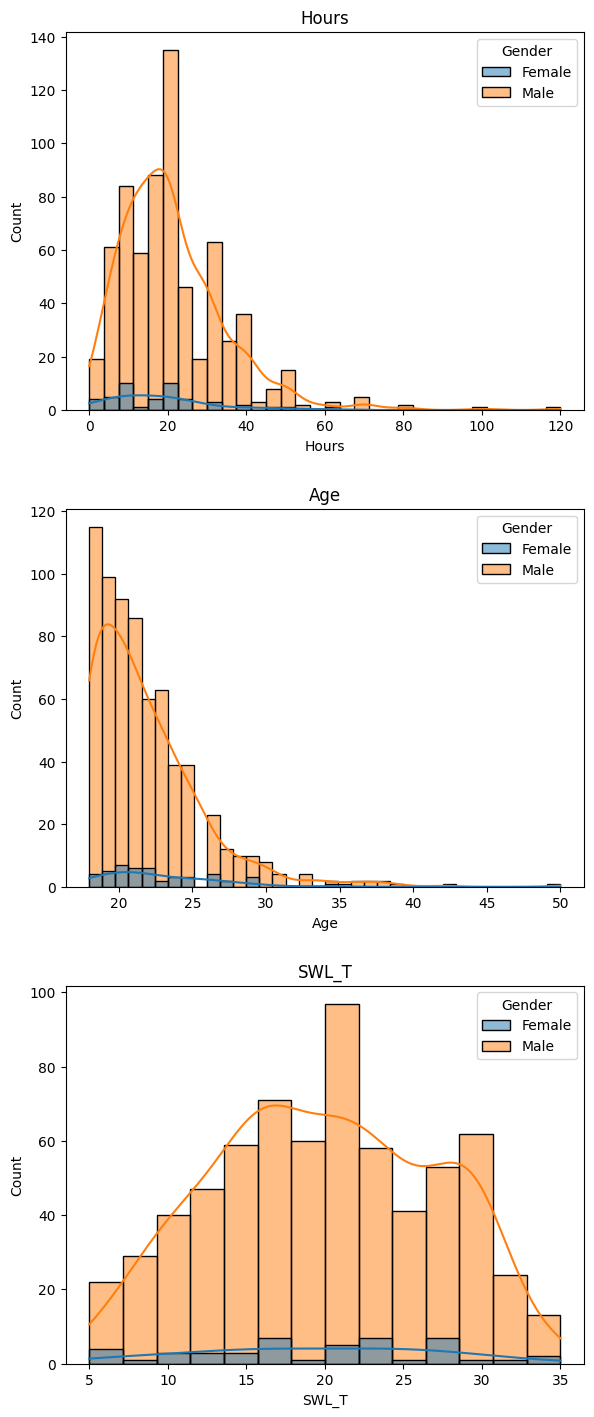

In [25]:
# Lista de variables numericas
variables_numericas = ["Hours", "Age", "SWL_T","GAD_T","SPIN_T"]

# Configurar el tamaño del lienzo para los gráficos
fig, axes = plt.subplots(3, 1, figsize=(7,15))
fig.tight_layout(pad=5.0)

# Generar histograma para variables numericas
for idx, attr in enumerate(variables_numericas[:3]):
    sns.histplot(
        x=attr,
        hue="Gender",
        data=df_juegosonline[df_juegosonline["Gender"] != "Other"],
        ax=axes[idx],
        kde=True)

    axes[idx].set_title(attr)

Se puede constatar, lo siguiente:

*   La edad de los jugadores radica en **menores de 20 años**
*   Un grupo importante de jugadores se encuentra en un **nivel alto de satisfacción con la vida y se enfoca en genero masculino**
*   La gran mayoria de los jugadores le dedica **20 horas semanales a los juegos online**

#Analisis Bivariado 📊

#  Respuestas de Hipótesis❓

### Hipótesis 1

**1**.¿Los jugadores de edades más jóvenes experimentan niveles de ansiedad más altos durante los juegos online en comparación con jugadores de edades más avanzadas?

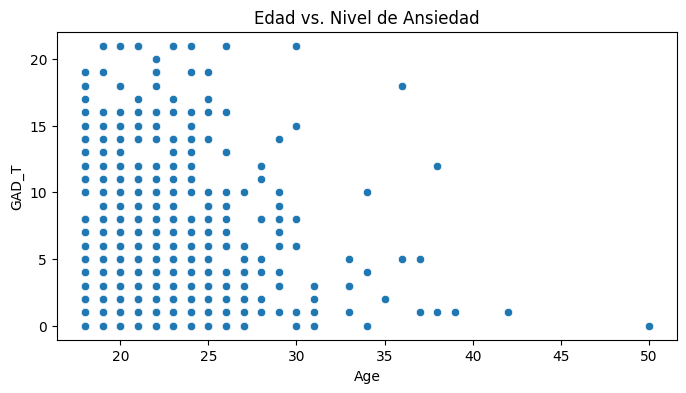

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x='Age', y='GAD_T', data=df_juegosonline)
plt.title('Edad vs. Nivel de Ansiedad')
plt.show()

Para responder nuestra primera hipótesis, se creó un Diagrama de Dispersión  tomando como variable cuantitativa discreta la Edad(Age) y la variable GAD_T(trastorno de ansiedad general) donde se puede visualizar que ciertamente los jugadores mas jovenes menores a 30 presentan niveles de ansiedad mas altos que los jugadores de edad mas avanzada.

### Hipótesis 2

**2**.¿A medida que a los jugadores le incrementa su ansiedad, aumenta se fobia social?

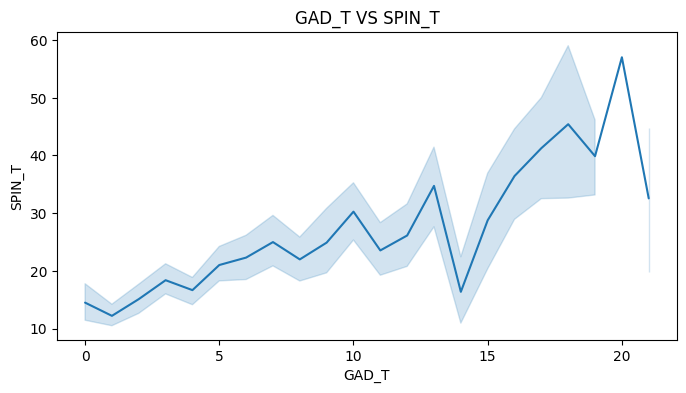

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(style="whitegrid")
sns.lineplot(x=df_juegosonline['GAD_T'], y=df_juegosonline['SPIN_T'])
plt.title('GAD_T VS SPIN_T')
plt.xlabel('GAD_T')
plt.ylabel('SPIN_T')
plt.show()

Para responder nuestra segunda hipótesis se utilizó un gráfico lineplot con dos variables cuantitativas discreta como lo son GAD_T  (trastorno de ansiedad general) VS SPIN_T' (inventario de fobia social) y se puede constatar que la hipótesis es cierta; en vista que a medida que incrementa la ansiedad aumenta la fobia social.

### Hipótesis 3

**3**.¿Normalmente se conectan jugadores los cuales su mayor nivel de estudio es secundario y no superan los 25 años?

Text(0.5, 1.0, 'Edad por Grado más alto de Estudio obtenido')

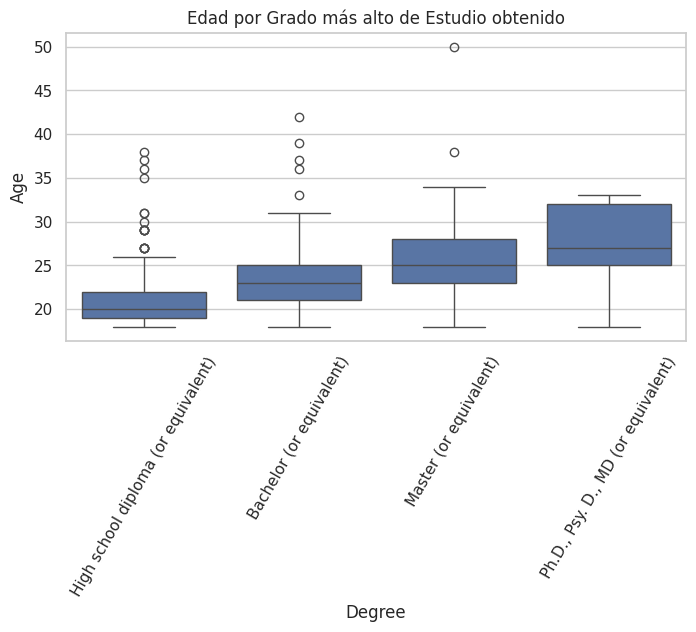

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.boxplot(x="Degree", y="Age", data=df_juegosonline)
ax. tick_params(axis='x', rotation=60)
ax.set_title('Edad por Grado más alto de Estudio obtenido')

Se generó un gráfico Boxplot para responder nuestra hipótesis numero 3; y se puede observar que la mayor parte de la conectividad no la ocupa aquellos jugadores en los cuales su mayor nivel de estudio es secundario; sino aquellos que su mayor nivel de estudio es Maestria y se encuentra entre los 25 a 28 años de Edad, y como outlier son los jugadores mayores a 40 años de edad; sin embargo se pueden observar distintos datos atipicos de acuerdo a su mas alto nivel de estuido.

### Hipótesis 4

  4.¿Los jugadores entre mas jovenes, presentan menos satisfaccion con la vida?

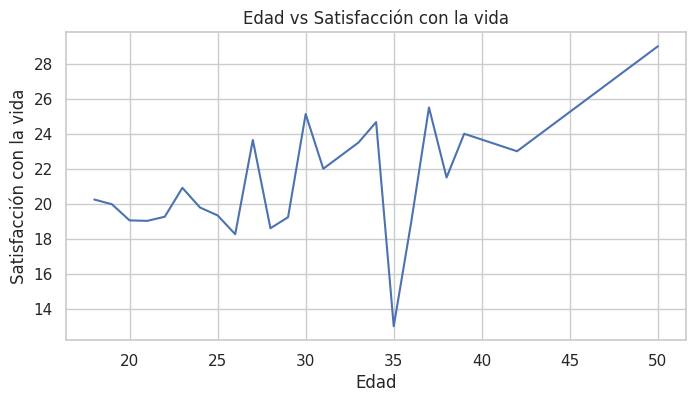

In [29]:
plt.figure(figsize=(8,4))
df_juegosonline.groupby('Age')['SWL_T'].mean().plot()
plt.title("Edad vs Satisfacción con la vida")
plt.xlabel("Edad")
plt.ylabel("Satisfacción con la vida");

#  Analisis Multivariado 📊📈

In [30]:
df_juegosonline= df_juegosonline.query('Age<30')#Excluir outliers extrayendo Edad menores de 30 años

In [31]:
df_juegosonline= df_juegosonline.query('Hours<80')#Excluir outliers extrayendo Cantidad de Horas menor a 80

In [32]:
df_juegosonline= df_juegosonline.query('streams<70')#Excluir outliers extrayendo Streams menor a 70

<Figure size 640x480 with 0 Axes>

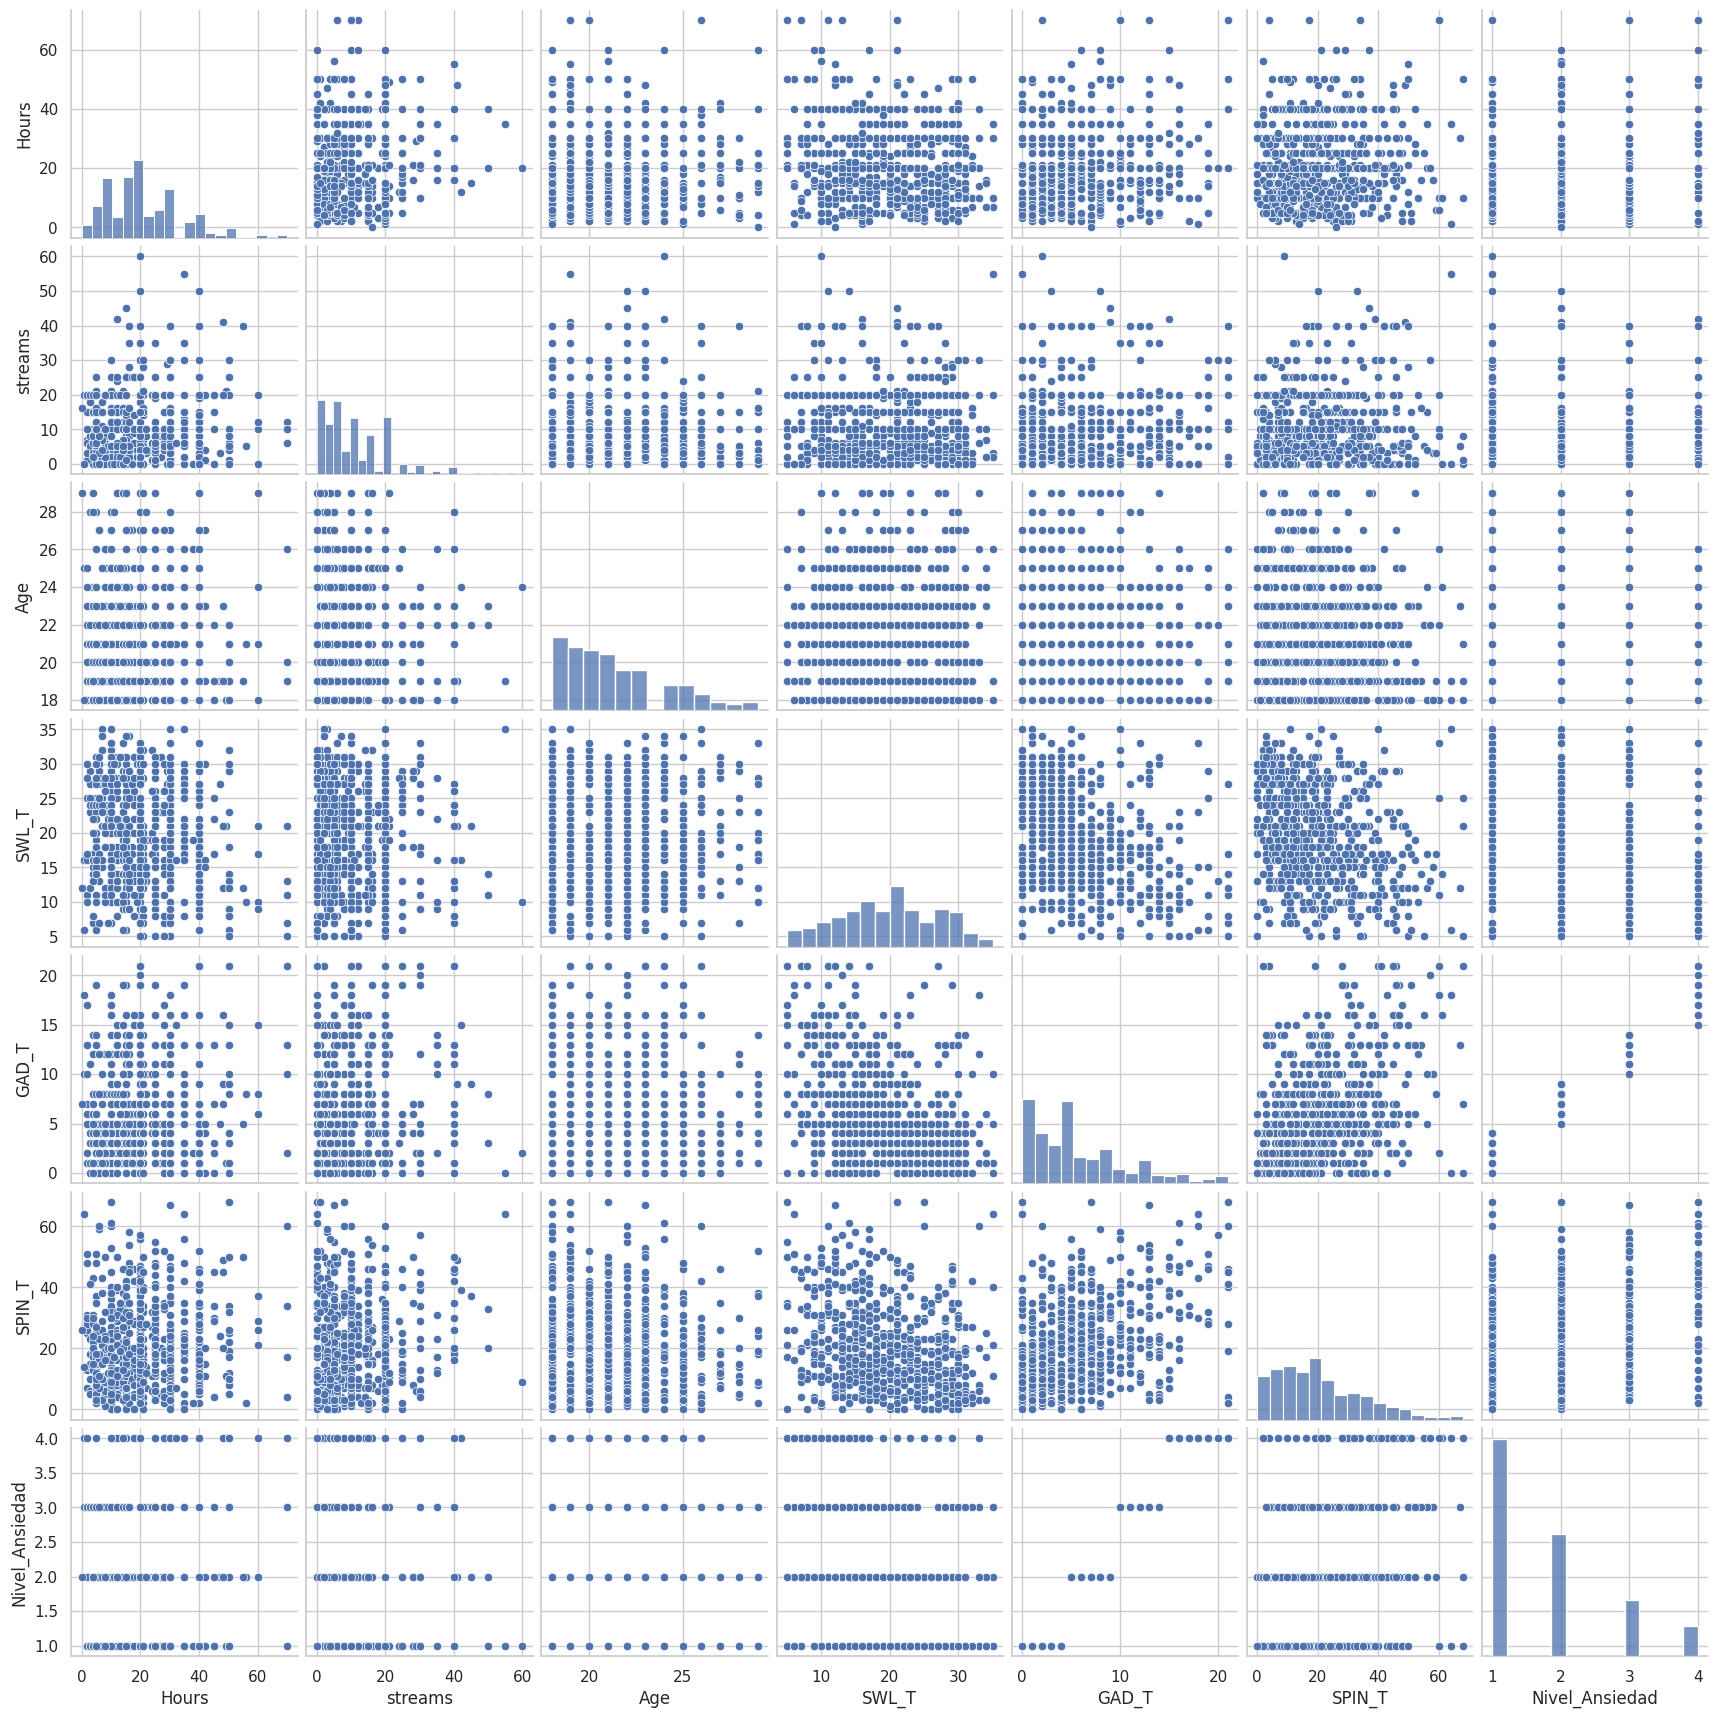

In [33]:
plt.figure(dpi=100) #Graficar todas nuestras variables
sns.pairplot(df_juegosonline)
plt.show()

In [34]:
numeric_columns = df_juegosonline.select_dtypes(include=['int64', 'float64']).columns

# Filtrar el DataFrame para incluir solo las columnas numéricas
numeric_data = df_juegosonline[numeric_columns]

# Calcular la matriz de correlación
matriz_correlacion = numeric_data.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

                   Hours   streams       Age     SWL_T     GAD_T    SPIN_T  \
Hours           1.000000  0.134598 -0.073582 -0.143510  0.124724  0.070845   
streams         0.134598  1.000000  0.019305 -0.070081  0.097242  0.104349   
Age            -0.073582  0.019305  1.000000 -0.005373  0.013591 -0.085540   
SWL_T          -0.143510 -0.070081 -0.005373  1.000000 -0.394871 -0.291926   
GAD_T           0.124724  0.097242  0.013591 -0.394871  1.000000  0.436547   
SPIN_T          0.070845  0.104349 -0.085540 -0.291926  0.436547  1.000000   
Nivel_Ansiedad  0.117277  0.076431 -0.009809 -0.389277  0.953830  0.435432   

                Nivel_Ansiedad  
Hours                 0.117277  
streams               0.076431  
Age                  -0.009809  
SWL_T                -0.389277  
GAD_T                 0.953830  
SPIN_T                0.435432  
Nivel_Ansiedad        1.000000  


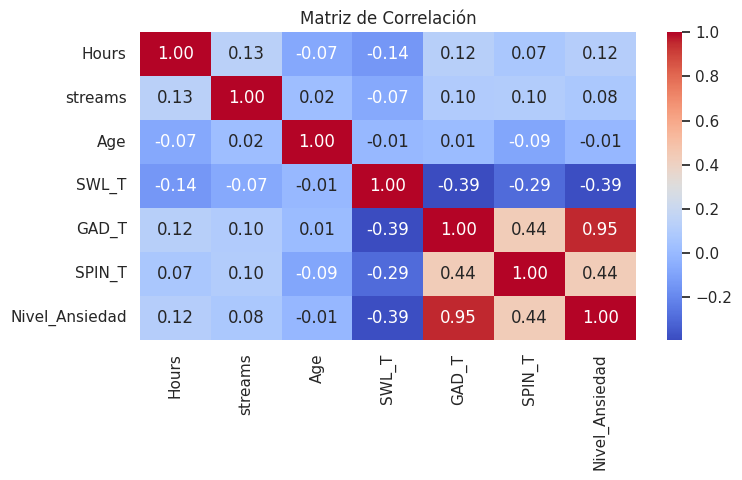

In [35]:
plt.figure(figsize=(8, 4))#Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#Entrenando y evaluando un modelo de Machine Learning ↘

###Modelo de Bosques Aleatorios

In [36]:
#Codificación de Variables Categóricas
df_encoded = pd.get_dummies(df_juegosonline, columns=['GADE', 'Game', 'Platform', 'whyplay', 'League', 'Gender', 'Work', 'Degree', 'Birthplace', 'Reference', 'Playstyle', 'Residence_ISO3', 'GAD'])


In [37]:
# Dividir los datos en características (X) y (y)
X = df_encoded.drop('Nivel_Ansiedad', axis=1)
y = df_encoded['Nivel_Ansiedad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA para reducir la dimensionalidad de las variables
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Inicializar y entrenar el modelo de Random Forest con características PCA
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) #Parametros
random_forest.fit(X_train_pca, y_train)  # Entrenar el modelo

# Hacer predicciones en el conjunto de prueba
predictions = random_forest.predict(X_test_pca)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8840579710144928


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de confusión:")
print(conf_matrix)

# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, predictions))

Matriz de confusión:
[[81  4  0  0]
 [ 8 20  0  0]
 [ 0  2 16  1]
 [ 0  0  1  5]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        85
           2       0.77      0.71      0.74        28
           3       0.94      0.84      0.89        19
           4       0.83      0.83      0.83         6

    accuracy                           0.88       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.88      0.88      0.88       138



En vista que, al realizar las métricas del modelo entregado en el desafío anterior, se observó como resultado un 100% en todas las métricas. Se concluyo que podía ser motivado a un sobreajuste y por ende, se regresó a las etapas anteriores aplicando filtro de outliers y PCA logrando un Accuracy de 0.86 el cual, se puede decir que es más creible

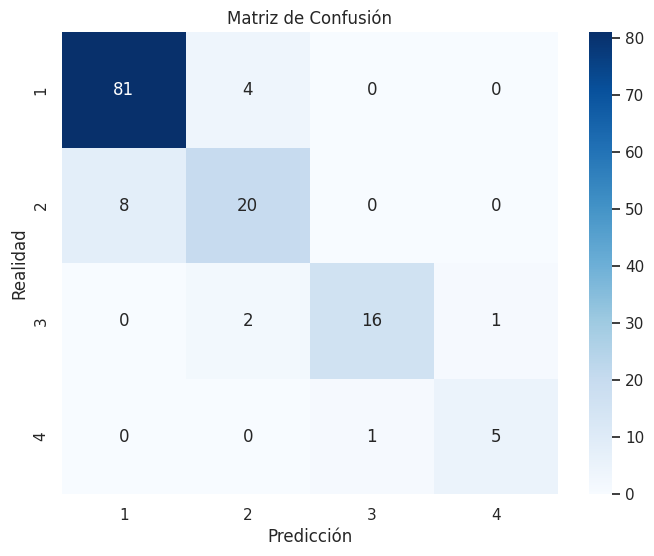

In [39]:
# Definir etiquetas de las clases
classes = sorted(y.unique())  # Obtener las clases únicas en y_test

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Visualizar la matriz de confusión utilizando un mapa de calor (heatmap)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)

# Configurar etiquetas y título
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Mostrar la matriz de confusión
plt.show()

###Modelo de Regresión Logística

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop('Nivel_Ansiedad', axis=1)
y = df_encoded['Nivel_Ansiedad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones
y_pred_logistico = modelo_logistico.predict(X_test)

# Evaluar el rendimiento
print("Precisión del modelo de regresión logística:", accuracy_score(y_test, y_pred_logistico))
print("Informe de clasificación:\n", classification_report(y_test, y_pred_logistico))

Precisión del modelo de regresión logística: 1.0
Informe de clasificación:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         6

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#FeatureSelection ✅


In [41]:
# Clasificar variables (X) y variable objetivo (y)
X = df_encoded.drop('Nivel_Ansiedad', axis=1)
y = df_encoded['Nivel_Ansiedad']

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                               Feature    Importance
4                                                GAD_T  2.147528e-01
313                                           GAD_leve  1.878578e-01
314                                         GAD_minima  1.677910e-01
315                                       GAD_moderado  1.025420e-01
312                                          GAD_grave  5.040770e-02
7                            GADE_Not difficult at all  3.090722e-02
5                                               SPIN_T  2.245173e-02
3                                                SWL_T  2.003702e-02
8                              GADE_Somewhat difficult  1.648133e-02
6                             GADE_Extremely difficult  1.407742e-02
9                                  GADE_Very difficult  1.318070e-02
0                                                Hours  1.248231e-02
1                                              streams  9.911168e-03
2                                 

In [42]:
importance_df.head() #Visualizar en una tabla la importancia de las caracteristicas

,Feature,Importance
4,GAD_T,0.214753
313,GAD_leve,0.187858
314,GAD_minima,0.167791
315,GAD_moderado,0.102542
312,GAD_grave,0.050408


#Crossvalidation📈📉

In [43]:
# Clasificar variables (X) y variable objetivo (y)
X = df_encoded.drop('Nivel_Ansiedad', axis=1)
y = df_encoded['Nivel_Ansiedad']

# Aplicar PCA para reducir la dimensionalidad de las variables
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada
X_pca = pca.fit_transform(X)

# Iniciar el modelo de Random Forest con características PCA
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) #Parametros

# Definir la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada
cv_accuracy = cross_val_score(random_forest, X_pca, y, cv=cv, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Cross-Validation Accuracy Scores:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())

Cross-Validation Accuracy Scores: [0.87681159 0.89130435 0.92028986 0.83333333 0.87681159]
Mean Accuracy: 0.8797101449275363


Los resultados de cross Validation, estan representados en 5 puntajes de precision obtenidos por la configuracion realizada. El Mean accuracy representa la precision promedio de esos puntajes. En este caso indica que el modelo tiene una precisión promedio de aproximadamente 84.57%.


#Conclusiones 📑

Para el modelo de Modelo de Bosques Aleatorios, se puede decir, que el modelo muestra un buen rendimiento general, con una alta precisión y recall para la mayoría de las clases. Sin embargo, existen algunas diferencias en la identificación de muestras en las clases 2 y 3, lo que puede requerir una mayor atención para mejorar la capacidad del modelo para distinguir estas clases específicas.

Los resultados del modelo de regresión logística muestran un rendimiento perfecto en todas las métricas, lo cual es indicativo de un modelo muy bien ajustado a los datos.

Sin embargo, es importante tener en cuenta algunas consideraciones:

* **Posible sobreajuste:** Dado que los modelos alcanzan una precisión del 100%.

* **validación en nuevos datos:** sería importante validar los modelos en conjuntos de datos independientes que no se hayan utilizado en el entrenamiento.

* **Interpretación de resultados:** la interpretación de la influencia real del nivel de ansiedad en el estilo de juego puede requerir análisis más profundos, como la identificación de características importantes y relaciones causales.

En resumen, los resultados sugieren que los modelos pueden predecir con precisión el estilo de juego basándose en las características proporcionadas, pero la influencia del nivel de ansiedad en el estilo de juego debe ser interpretada cuidadosamente, considerando posibles limitaciones y la necesidad de validación en nuevos datos.